Project Milestone5
Saurabh Biswas 
DSC540-T303

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#read Year wise population for USA into dataframe
df1 = pd.read_csv("Year_Population.csv")
df1.head(1)

,Year,Population in 10 Million
0,2018,32.716744


In [3]:
#read Year wise Vaccine Effectiveness for USA into dataframe
df2 = pd.read_csv("Year_VE.csv")
df2.head(1)

,Year,VE Mean(%)
0,2005,15.5


In [4]:
df3 = pd.merge(df1, df2, on=["Year"]) # merge df1 and df2 to get Year, Population & VE
df3.head(1)

,Year,Population in 10 Million,VE Mean(%)
0,2018,32.716744,33.5


In [6]:
df3.head(20)

,Year,Population in 10 Million,VE Mean(%)
0,2018,32.716744,33.5
1,2017,32.571918,39.0
2,2016,32.312752,44.0
3,2015,32.141882,33.5
4,2014,31.885706,35.5
5,2013,31.612884,50.5


In [7]:
#read Year wise details of fle deaths for USA into dataframe
df4 = pd.read_csv("Year_Data.csv")
df4.head(1)

,Year,Month,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65
0,2005,Apr,3068.0,38827.0,836.0,892.0,2644.0,8482.0,25922.0


In [87]:
df5 = pd.merge(df3, df4, on=["Year"]) # merge df3 and df4 to get Year wise combined view
df5.Year = df5.Year.astype('str') # change data type
df5.head(1)

,Year,Population in 10 Million,VE Mean(%),Month,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65
0,2016,32.312752,44.0,Apr,2682.0,35138.0,609.0,735.0,2264.0,8282.0,23175.0


In [88]:
# get per 10M counts
df5['Flu_Deaths_per10m'] = df5['Flu_Deaths']/df5['Population in 10 Million']
df5['All_Deaths_per10m'] = df5['All_Deaths']/df5['Population in 10 Million']
df5['Deaths_Age_Group_Under_1_per10m'] = df5['Deaths_Age_Group_Under_1']/df5['Population in 10 Million']
df5['Deaths_Age_Group_1_to_24_per10m'] = df5['Deaths_Age_Group_1_to_24']/df5['Population in 10 Million']
df5['Deaths_Age_Group_25_to_44_per10m'] = df5['Deaths_Age_Group_25_to_44']/df5['Population in 10 Million']
df5['Deaths_Age_Group_45_to_64_per10m'] = df5['Deaths_Age_Group_45_to_64']/df5['Population in 10 Million']
df5['Deaths_Age_Group_Above_65_per10m'] = df5['Deaths_Age_Group_Above_65']/df5['Population in 10 Million']
df5.head(5)

,Year,Population in 10 Million,VE Mean(%),Month,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65,Flu_Deaths_per10m,All_Deaths_per10m,Deaths_Age_Group_Under_1_per10m,Deaths_Age_Group_1_to_24_per10m,Deaths_Age_Group_25_to_44_per10m,Deaths_Age_Group_45_to_64_per10m,Deaths_Age_Group_Above_65_per10m
0,2016,32.312752,44.0,Apr,2682.0,35138.0,609.0,735.0,2264.0,8282.0,23175.0,83.001288,1087.434476,18.847049,22.746438,70.065219,256.307483,717.209118
1,2016,32.312752,44.0,Aug,1797.0,33742.0,643.0,808.0,2316.0,8052.0,21911.0,55.612720,1044.231718,19.899265,25.005608,71.674490,249.189550,678.091434
2,2016,32.312752,44.0,Feb,2380.0,33881.0,540.0,716.0,2077.0,7890.0,22652.0,73.655133,1048.533425,16.711669,22.158435,64.278030,244.176049,701.023557
3,2016,32.312752,44.0,Jan,2382.0,34568.0,602.0,681.0,2060.0,8033.0,23165.0,73.717028,1069.794381,18.630416,21.075271,63.751922,248.601547,716.899643
4,2016,32.312752,44.0,Jul,1815.0,32415.0,572.0,743.0,2335.0,7791.0,20949.0,56.169776,1003.164339,17.701990,22.994018,72.262494,241.112243,648.319906


In [132]:
#DROP table
# DROP TABLE Flu_Details_Year
#query = """
#DROP TABLE Flu_State_Wise
# ;"""
#conn.execute(query)  #execute the query
#conn.commit() # commit the changes

In [91]:
#define table
query = """
CREATE TABLE Flu_Details_Year
(Year VARCHAR(4),
 Population_in_10_Million REAL,
 VE_Percent REAL,
 Month VARCHAR(3),
 Flu_Deaths REAL,
 All_Deaths REAL,
 Deaths_Age_Group_Under_1 REAL,
 Deaths_Age_Group_1_to_24 REAL,
 Deaths_Age_Group_25_to_44 REAL,
 Deaths_Age_Group_45_to_64 REAL,
 Deaths_Age_Group_Above_65 REAL
 Flu_Deaths_per10m REAL,
 All_Deaths_per10m REAL,
 Deaths_Age_Group_Under_1_per10m REAL,
 Deaths_Age_Group_1_to_24_per10m REAL,
 Deaths_Age_Group_25_to_44_per10m REAL,
 Deaths_Age_Group_45_to_64_per10m REAL,
 Deaths_Age_Group_Above_65_per10m REAL
 );"""


In [92]:
conn = sqlite3.connect('Final_Proj_DSC540.db') # connect


try:
    conn.execute(query)  #execute the query
    conn.commit() # commit the changes

except sqlite3.Error as er:
        print("Error while creating to sqlite, {}".format(er)) # print error with error code 

In [93]:
df5.to_sql('Flu_Details_Year', conn, if_exists='replace', index = False) # load datafame into the table

In [94]:
c = conn.cursor()
c.execute('''  
SELECT * FROM Flu_Details_Year LIMIT 5
          ''')

for row in c.fetchall():
    print (row)

('2016', 32.312751500000005, 44.0, 'Apr', 2682.0, 35138.0, 609.0, 735.0, 2264.0, 8282.0, 23175.0, 83.00128820660784, 1087.4344761386228, 18.84704866436397, 22.746438043197898, 70.06521868000006, 256.30748282144896, 717.2091178926684)
('2016', 32.312751500000005, 44.0, 'Aug', 1797.0, 33742.0, 643.0, 808.0, 2316.0, 8052.0, 21911.0, 55.61271995051241, 1044.231717623923, 19.89926484595408, 25.00560808014136, 71.67449048713786, 249.1895498283394, 678.0914339653185)
('2016', 32.312751500000005, 44.0, 'Feb', 2380.0, 33881.0, 540.0, 716.0, 2077.0, 7890.0, 22652.0, 73.65513271130747, 1048.5334249545415, 16.711668766431107, 22.15843488289754, 64.27802968125447, 244.17604919841008, 701.0235572170324)
('2016', 32.312751500000005, 44.0, 'Jan', 2382.0, 34568.0, 602.0, 681.0, 2060.0, 8033.0, 23165.0, 73.71702778081277, 1069.7943813296122, 18.63041592109542, 21.075271166554785, 63.75192159045941, 248.60154666803905, 716.8996425451419)
('2016', 32.312751500000005, 44.0, 'Jul', 1815.0, 32415.0, 572.0, 7

In [133]:
#read State wise flu details into dataframe
df6 = pd.read_csv("State_Details.csv")
df6

,Year,State,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65,State Name in Full,Population in Million
0,2013,AL,1226.0,16463.0,313.0,329.0,994.0,4047.0,10776.0,Alabama,4.833722
1,2014,AL,1302.0,18002.0,333.0,386.0,1153.0,4520.0,11605.0,Alabama,4.849377
2,2015,AL,1213.0,16953.0,318.0,385.0,1142.0,4091.0,11016.0,Alabama,4.858979
3,2016,AL,886.0,13049.0,267.0,303.0,884.0,3079.0,8513.0,Alabama,4.863300
4,2013,AR,220.0,4452.0,106.0,109.0,280.0,1122.0,2835.0,Arkansas,2.959373
...,...,...,...,...,...,...,...,...,...,...,...
155,2016,WA,557.0,8149.0,79.0,118.0,374.0,1688.0,5825.0,Washington,7.288000
156,2013,WI,306.0,4230.0,79.0,94.0,283.0,1146.0,2628.0,Wisconsin,5.742713
157,2014,WI,271.0,4066.0,76.0,64.0,284.0,1066.0,2576.0,Wisconsin,5.757564
158,2015,WI,218.0,4264.0,83.0,96.0,359.0,1088.0,2638.0,Wisconsin,5.771337


In [134]:
# Get names of indexes for which column AAll_Deaths is 0
indexNames = df6[df6.All_Deaths == 0 ].index

In [135]:
# Delete these row indexes from dataFrame
df6.drop(indexNames , inplace=True)
df6

,Year,State,Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65,State Name in Full,Population in Million
0,2013,AL,1226.0,16463.0,313.0,329.0,994.0,4047.0,10776.0,Alabama,4.833722
1,2014,AL,1302.0,18002.0,333.0,386.0,1153.0,4520.0,11605.0,Alabama,4.849377
2,2015,AL,1213.0,16953.0,318.0,385.0,1142.0,4091.0,11016.0,Alabama,4.858979
3,2016,AL,886.0,13049.0,267.0,303.0,884.0,3079.0,8513.0,Alabama,4.863300
4,2013,AR,220.0,4452.0,106.0,109.0,280.0,1122.0,2835.0,Arkansas,2.959373
...,...,...,...,...,...,...,...,...,...,...,...
155,2016,WA,557.0,8149.0,79.0,118.0,374.0,1688.0,5825.0,Washington,7.288000
156,2013,WI,306.0,4230.0,79.0,94.0,283.0,1146.0,2628.0,Wisconsin,5.742713
157,2014,WI,271.0,4066.0,76.0,64.0,284.0,1066.0,2576.0,Wisconsin,5.757564
158,2015,WI,218.0,4264.0,83.0,96.0,359.0,1088.0,2638.0,Wisconsin,5.771337


In [136]:
# get per 10M counts
df6['Flu_Deaths_perM'] = df6['Flu_Deaths']/df6['Population in Million']
df6.Year = df6.Year.astype('str') # change data type

In [137]:
#define table
query = """
CREATE TABLE Flu_State_Wise
(Year VARCHAR(4),
 State VARCHAR(2),
 Flu_Deaths REAL,
 All_Deaths REAL,
 Deaths_Age_Group_Under_1 REAL,
 Deaths_Age_Group_1_to_24 REAL,
 Deaths_Age_Group_25_to_44 REAL,
 Deaths_Age_Group_45_to_64 REAL,
 Deaths_Age_Group_Above_65 REAL
 State_Name_in_Full VARCHAR(30),
 Population_in_Million REAL
 );"""

In [138]:
try:
    conn.execute(query)  #execute the query
    conn.commit() # commit the changes

except sqlite3.Error as er:
        print("Error while creating to sqlite, {}".format(er)) # print error with error code 

In [139]:
df6.to_sql('Flu_State_Wise', conn, if_exists='replace', index = False) # load datafame into the table

In [140]:
c = conn.cursor()
c.execute('''  
SELECT * FROM Flu_State_Wise LIMIT 5
          ''')

for row in c.fetchall():
    print (row)

('2013', 'AL', 1226.0, 16463.0, 313.0, 329.0, 994.0, 4047.0, 10776.0, 'Alabama', 4.833722, 253.6347766793374)
('2014', 'AL', 1302.0, 18002.0, 333.0, 386.0, 1153.0, 4520.0, 11605.0, 'Alabama', 4.849377, 268.4880965121912)
('2015', 'AL', 1213.0, 16953.0, 318.0, 385.0, 1142.0, 4091.0, 11016.0, 'Alabama', 4.858979, 249.64092250655952)
('2016', 'AL', 886.0, 13049.0, 267.0, 303.0, 884.0, 3079.0, 8513.0, 'Alabama', 4.8633, 182.180823720519)
('2013', 'AR', 220.0, 4452.0, 106.0, 109.0, 280.0, 1122.0, 2835.0, 'Arkansas', 2.959373, 74.34007135971032)


In [141]:
df7=df5.groupby(['Year','VE Mean(%)'],as_index=False)["Flu_Deaths","All_Deaths","Deaths_Age_Group_Under_1", 
                                                         "Deaths_Age_Group_1_to_24","Deaths_Age_Group_25_to_44",
                                                         "Deaths_Age_Group_45_to_64", 
                                                         "Deaths_Age_Group_Above_65",
                                                         "Flu_Deaths_per10m","All_Deaths_per10m",
                                                         "Deaths_Age_Group_Under_1_per10m", 
                                                         "Deaths_Age_Group_1_to_24_per10m",
                                                         "Deaths_Age_Group_25_to_44_per10m",
                                                         "Deaths_Age_Group_45_to_64_per10m", 
                                                         "Deaths_Age_Group_Above_65_per10m",
                                                ].sum()
df7

,Year,VE Mean(%),Flu_Deaths,All_Deaths,Deaths_Age_Group_Under_1,Deaths_Age_Group_1_to_24,Deaths_Age_Group_25_to_44,Deaths_Age_Group_45_to_64,Deaths_Age_Group_Above_65,Flu_Deaths_per10m,All_Deaths_per10m,Deaths_Age_Group_Under_1_per10m,Deaths_Age_Group_1_to_24_per10m,Deaths_Age_Group_25_to_44_per10m,Deaths_Age_Group_45_to_64_per10m,Deaths_Age_Group_Above_65_per10m
0,2013,50.5,28768.0,432457.0,7543.0,9092.0,25370.0,102930.0,287274.0,910.008720,13679.770608,238.605248,287.604257,802.520899,3255.950970,9087.244331
1,2014,35.5,28543.0,444982.0,7898.0,9151.0,26789.0,106388.0,294424.0,895.166014,13955.532475,247.697200,286.993806,840.157039,3336.542128,9233.730114
2,2015,33.5,27951.0,429979.0,7594.0,9330.0,26742.0,101097.0,284846.0,869.613046,13377.530247,236.264945,290.275472,831.998572,3145.335413,8862.144386
3,2016,44.0,20319.0,317065.0,5477.0,6992.0,20907.0,74814.0,208685.0,628.822959,9812.380106,169.499648,216.385163,647.020109,2315.308865,6458.286290


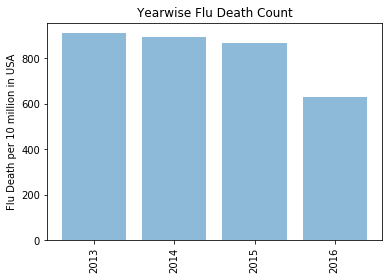

In [142]:
y_pos = np.arange(len(df7.Year)) # width of bar 

plt.bar(y_pos, df7.Flu_Deaths_per10m, align='center', alpha=0.5) # bar plot
plt.xticks(y_pos, df7.Year, rotation=90)
plt.ylabel('Flu Death per 10 million in USA') # y-axis label
plt.title('Yearwise Flu Death Count') # title of the plot

plt.show() # show the bar plot

From the above bar plot we can see year 2013 has highest flu death count per 10 million people

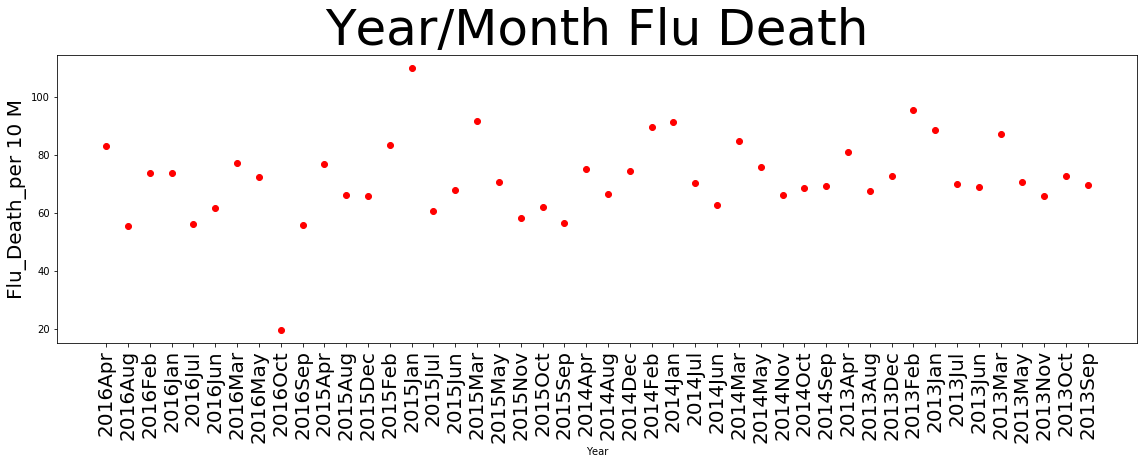

In [143]:
fig=plt.figure()
ax=fig.add_axes([0,0,2.5,1])
ax.scatter( df5.Year+df5.Month, df5.Flu_Deaths_per10m, color='r') # scatter plot
ax.set_xlabel('Year') # x-axis name
ax.set_ylabel('Flu_Death_per 10 M', fontsize=20) # y-axis name
ax.set_title('Year/Month Flu Death', fontsize = 50) # title
ax.set_xticklabels(df5.Year+df5.Month, rotation='vertical', fontsize=20)
plt.show() # show the plot

From the above scatter plot we can see 2015 Jan has highest flu death count per 10 million people.

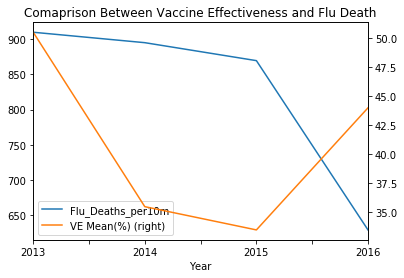

In [144]:
fig, ax = plt.subplots() # Create the figure and axes object
ax.set_title('Comaprison Between Vaccine Effectiveness and Flu Death') # title
# Plot the first x and y axes:
df7.plot(x = 'Year', y = 'Flu_Deaths_per10m', ax = ax) 
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
df7.plot(x = 'Year', y = 'VE Mean(%)', ax = ax, secondary_y = True) 

In 2013 vaccine effectiveness was highest, eventhough flu caused more death than other years. I didn't expect this behavior. Whereas in 2016, flu death reate dropped with increase in vaccine effectiveness than year 2014 and 2015. This is inline with my expectation. But due to this mixed behavior, we can't conclude what is the effect on vaccine effectiveness on flu death rate.

In [164]:
df8=df6[df6.Year == '2013']

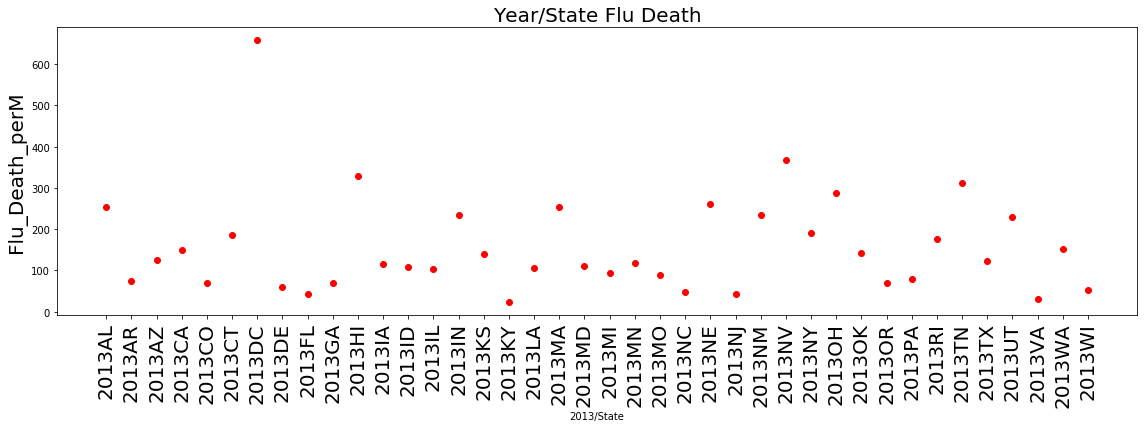

In [166]:
fig=plt.figure()
ax=fig.add_axes([0,0,2.5,1])
ax.scatter( df8.Year+df8.State, df8.Flu_Deaths_perM, color='r') # scatter plot
ax.set_xlabel('2013/State') # x-axis name
ax.set_ylabel('Flu_Death_perM', fontsize=20) # y-axis name
ax.set_title('Year/State Flu Death', fontsize = 20) # title
ax.set_xticklabels(df8.Year+df8.State, rotation='vertical', fontsize=20)
plt.show() # show the plot

From the above scatter plot we can see DC was most affected state by flu on 2013.

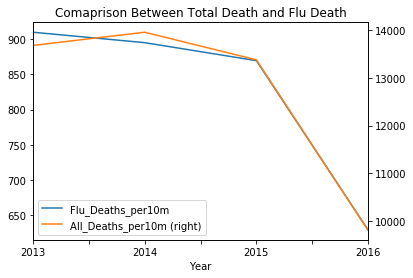

In [168]:
fig, ax = plt.subplots() # Create the figure and axes object
ax.set_title('Comaprison Between Total Death and Flu Death') # title
# Plot the first x and y axes:
df7.plot(x = 'Year', y = 'Flu_Deaths_per10m', ax = ax) 
# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
df7.plot(x = 'Year', y = 'All_Deaths_per10m', ax = ax, secondary_y = True)

From the above comparison of flu death vs all death we can see on 2013, other deaths(other than flu) were less as compared to 2014.